# Data Visualization exploration

In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import binarize
from sklearn.preprocessing import MinMaxScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mapseq_fxns import * # import all functions from this script
# from math import log10
from scipy import stats



# random sample consimment between runs
import random



%matplotlib inline


In [2]:

# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/output/'

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp


# binarized data

In [ ]:

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)

    


In [ ]:
# seperate by cell type

omc_type = [sort_by_celltype(omc_bin[i]) for i in range(num_samples)]
omc_pt = [(omc_type[i][omc_type[i]['type']==1000]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_type[i][omc_type[i]['type']==10]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]
dataset_mm = []
dataset_st = []

for i in range(num_samples):
    if metadata.species[i] == 'MMus':
        omc_mm.append(omc_type[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
        dataset_mm.append(dataset[i])
    else:
        omc_st.append(omc_type[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])
        dataset_st.append(dataset[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)


In [ ]:


for i in range(len(omc_it_mm)):
    omc_it_mm[i] = clean_up_data(omc_it_mm[i])

for i in range(len(omc_pt_mm)):
    omc_pt_mm[i] = clean_up_data(omc_pt_mm[i])

for i in range(len(omc_it_st)):
    omc_it_st[i] = clean_up_data(omc_it_st[i])

for i in range(len(omc_pt_st)):
    omc_pt_st[i] = clean_up_data(omc_pt_st[i])

omc_it_mm_all = pd.concat(omc_it_mm)
omc_it_st_all = pd.concat(omc_it_st)

omc_pt_mm_all = pd.concat(omc_pt_mm)
omc_pt_st_all = pd.concat(omc_pt_st)

In [ ]:
# need to change type values so that can visualize on heatmap

# change type so .25,.5,.75
mm_type_col = omc_mm_all['type']
mm_replace = np.where(mm_type_col==1000, 0.75, mm_type_col)
mm_replace = np.where(mm_replace==100, 0.5, mm_replace)
mm_replace = np.where(mm_replace==10, 0.25, mm_replace)
omc_mm_all['type'] = mm_replace

# change type so .25,.5,.75
st_type_col = omc_st_all['type']
st_replace = np.where(st_type_col==1000, 0.75, st_type_col)
st_replace = np.where(st_replace==100, 0.5, st_replace)
st_replace = np.where(st_replace==10, 0.25, st_replace)
omc_st_all['type'] = st_replace

print(omc_mm_all.shape)
print(omc_st_all.shape)
omc_mm_all.columns

In [ ]:
plot = omc_mm_all #.sample(1000, random_state=10)

# sort by cell type
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot, cmap=blue_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)
# plt.savefig(out_path+"mm_single_heatmap.jpeg", dpi=300)


In [ ]:
plot = omc_st_all #.sample(1000, random_state=10)

# sort by cell type
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot, cmap=orange_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)
# plt.savefig(out_path+"mm_single_heatmap.jpeg", dpi=300)


# count data


In [3]:
#### load data
with open(in_path +'M194_M220_OMC_count4.pkl', 'rb') as f:
    omc_count = pickle.load(f)

In [4]:
omc_count = [clean_up_data(df) for df in omc_count]


omc_count[0]

,OMCi,OMCc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS
2,43.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95.0,36.0,0.0,206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,126.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,56.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,268.0,0.0,0.0,33.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20257,137.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20259,125.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20260,286.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20263,175.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
omc_values = []
for i in range(num_samples):
    values = omc_count[i].values
    flat = values.flatten() # make single array
    # nzeros = flat.nonzero() # drop zeros to find range
    # omc_values.append(nzeros)
    omc_values.append(flat)
1


1

Text(0.5, 0.98, 'With zeros')

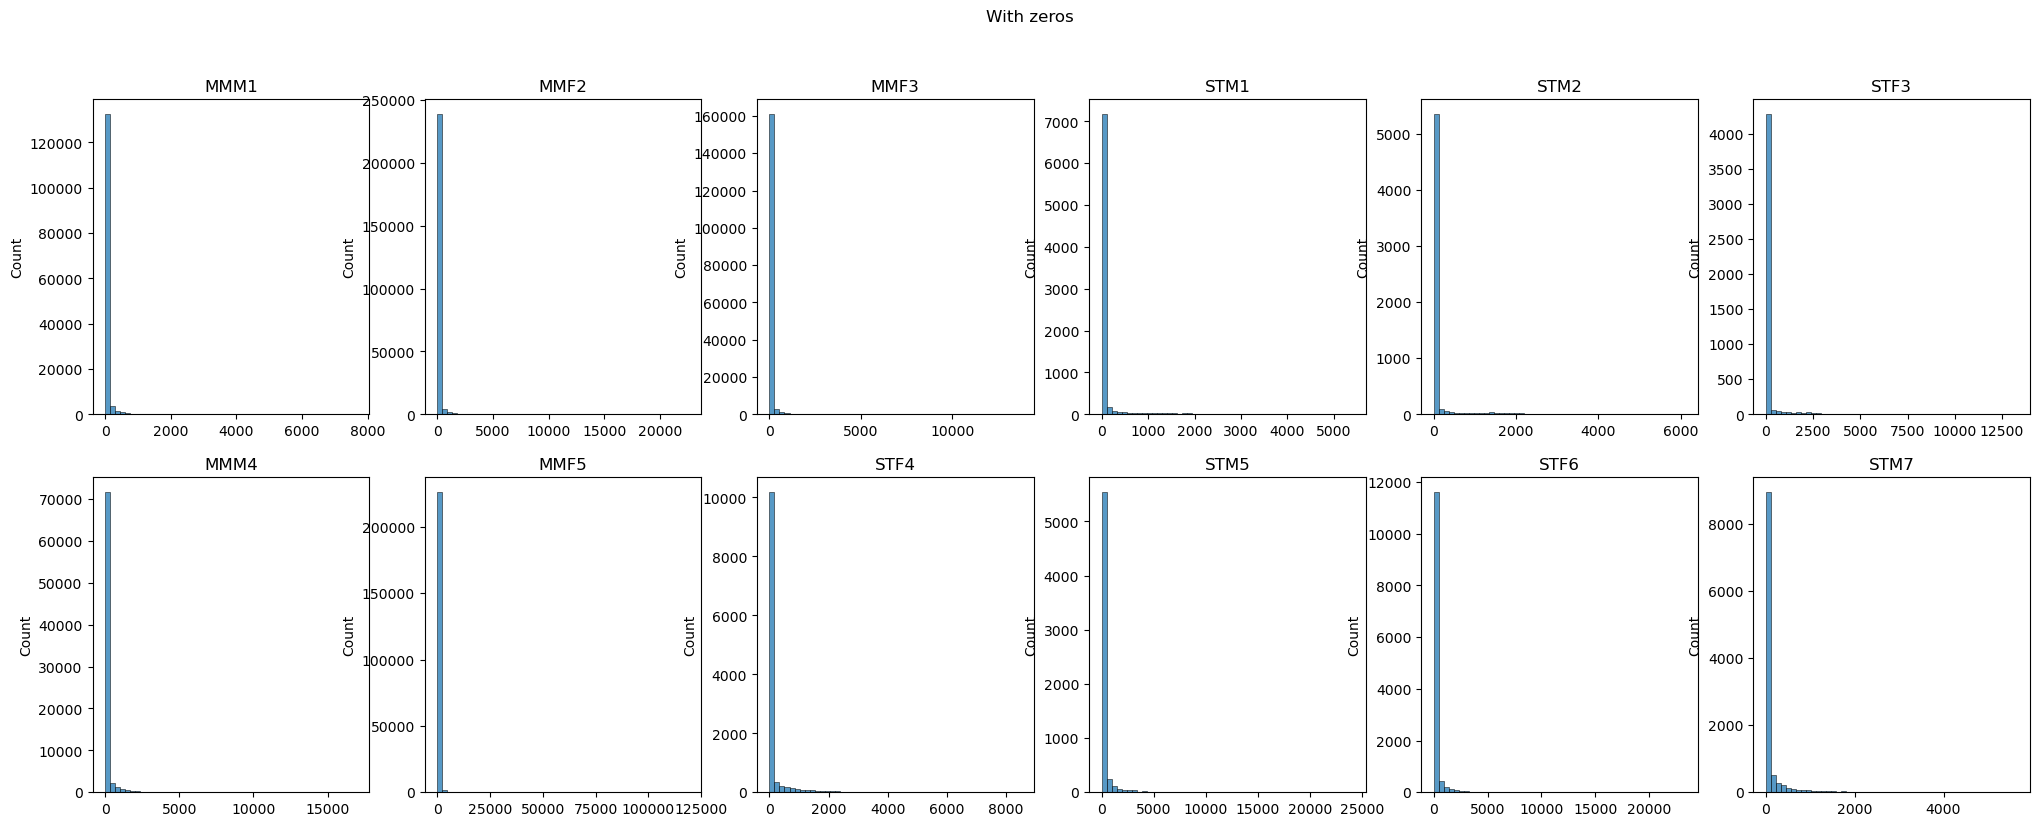

In [6]:
# plot histogram of count values
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    sns.histplot(omc_values[i], bins = 50, legend=False, ax=ax)
    ax.set_title(mice[i])
    i+=1
fig.suptitle("With zeros")

Text(0.5, 0.98, 'Without zeros')

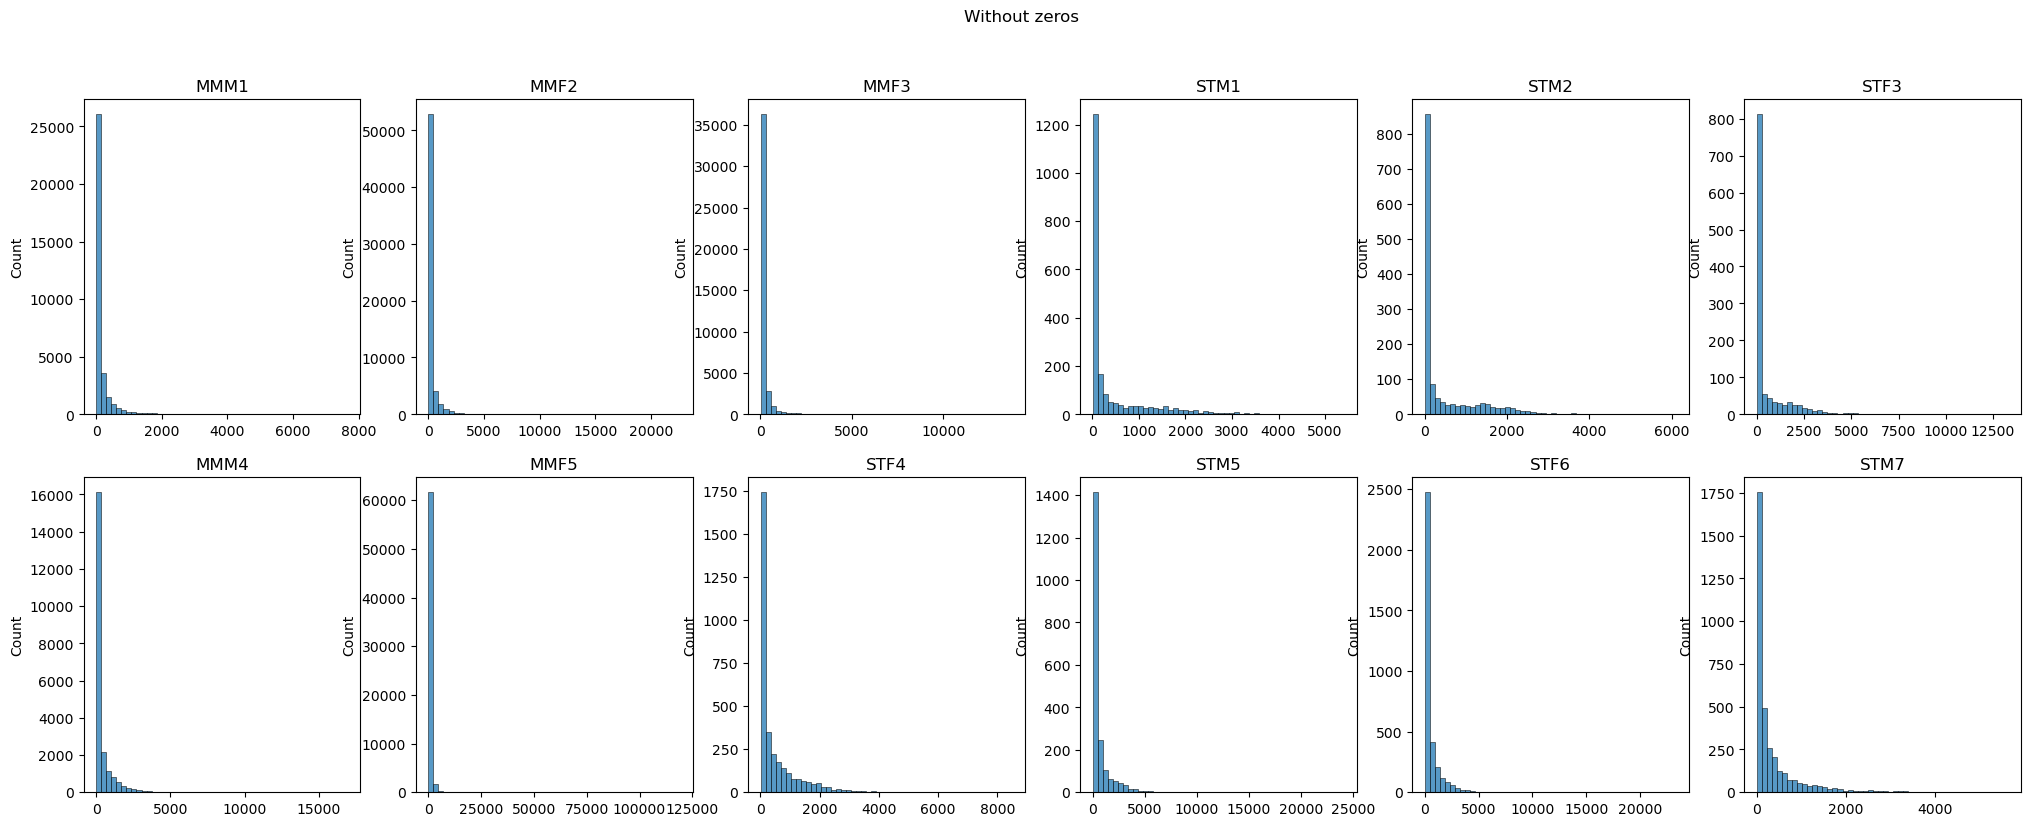

In [7]:
# plot = []
# for i in range(num_samples):
#     plot.append(omc_values[i].nonzero())

# plot histogram of count values
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    idx = omc_values[i].nonzero()
    plot = omc_values[i][idx]
    sns.histplot(plot, bins = 50, legend=False, ax=ax)
    ax.set_title(mice[i])
    i+=1
fig.suptitle("Without zeros")



In [8]:
# use min/max scaling to get all count values within same range
# all min is 0, so formula (x-xmin/xmax-xmin) becomes (x/xmax)
# scale w/ data that includes 0 (?)
omc_scaled = []
for i in range(num_samples):
    df = omc_count[i].copy()
    max_c = df.values.flatten().max().max() # get max value for each brain
    df_scaled = df/max_c * 1000 # normalize to max and scale by 1000 so numbers are reasonable/interpretable
    omc_scaled.append(df_scaled)

Text(0.5, 0.98, 'Scaled - Without zeros')

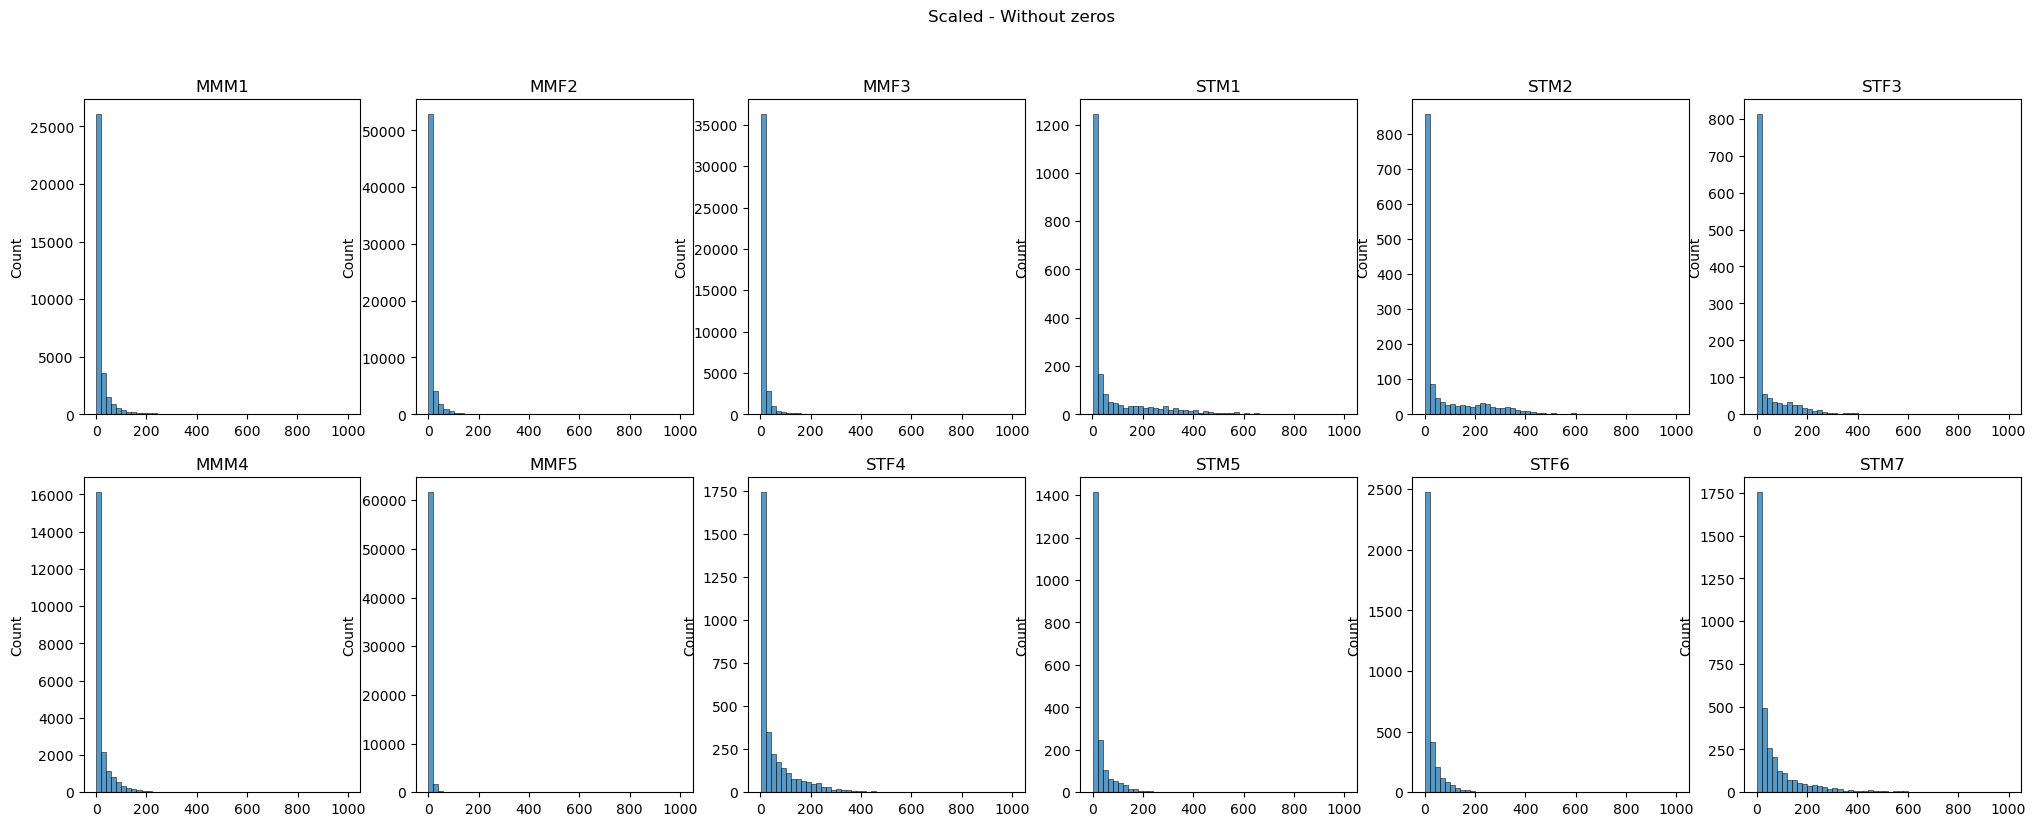

In [9]:
# plot = []
# for i in range(num_samples):
#     plot.append(omc_values[i].nonzero())

# plot histogram of count values
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_scaled[i]
    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    sns.histplot(plot, bins = 50, legend=False, ax=ax)
    ax.set_title(mice[i])
    i+=1
fig.suptitle("Scaled - Without zeros")



# combine datasets and plot
Not perfect yet, need to scale median value??? but decided to move on

In [10]:
omc_mm = []
omc_st = []
for i in range(num_samples):
    if species[i] == "MMus":
        omc_mm.append(omc_scaled[i])
    elif species[i] == "STeg":
        omc_st.append(omc_scaled[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)

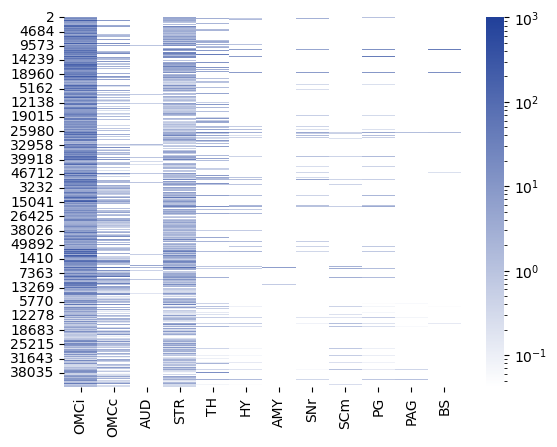

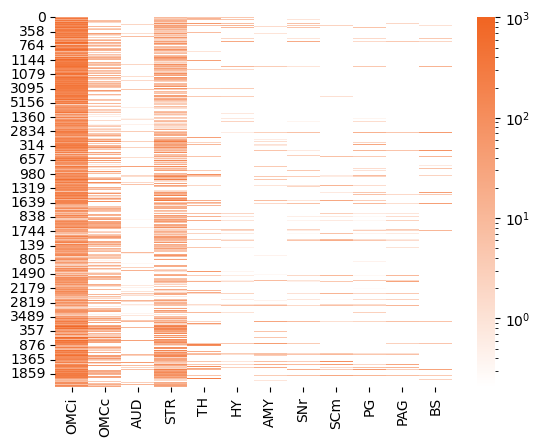

In [11]:
sns.heatmap(omc_mm_all, cmap=blue_cmp, norm=LogNorm())
plt.show()
sns.heatmap(omc_st_all, cmap=orange_cmp, norm=LogNorm())
plt.show()

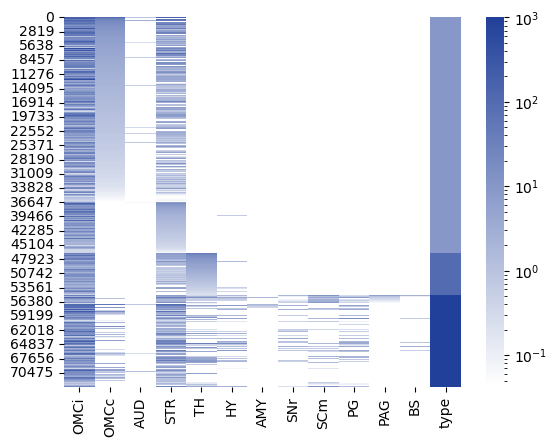

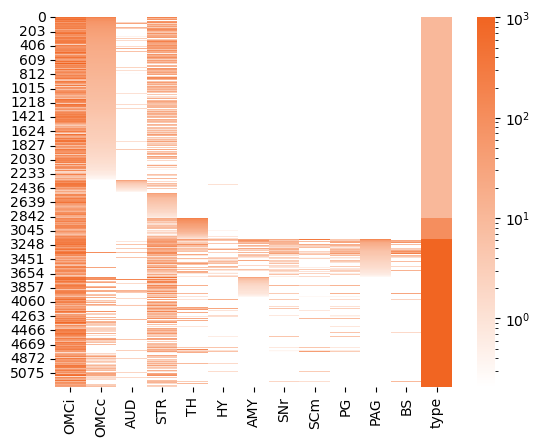

In [12]:
# sort cells?
omc_mm_sort = sort_by_celltype(omc_mm_all, pt_areas=["AMY","SNr","SCm","PG","PAG","BS"])
omc_st_sort = sort_by_celltype(omc_st_all, pt_areas=["AMY","SNr","SCm","PG","PAG","BS"])
sns.heatmap(omc_mm_sort, cmap=blue_cmp, norm=LogNorm())
plt.show()
sns.heatmap(omc_st_sort, cmap=orange_cmp, norm=LogNorm())
plt.show()


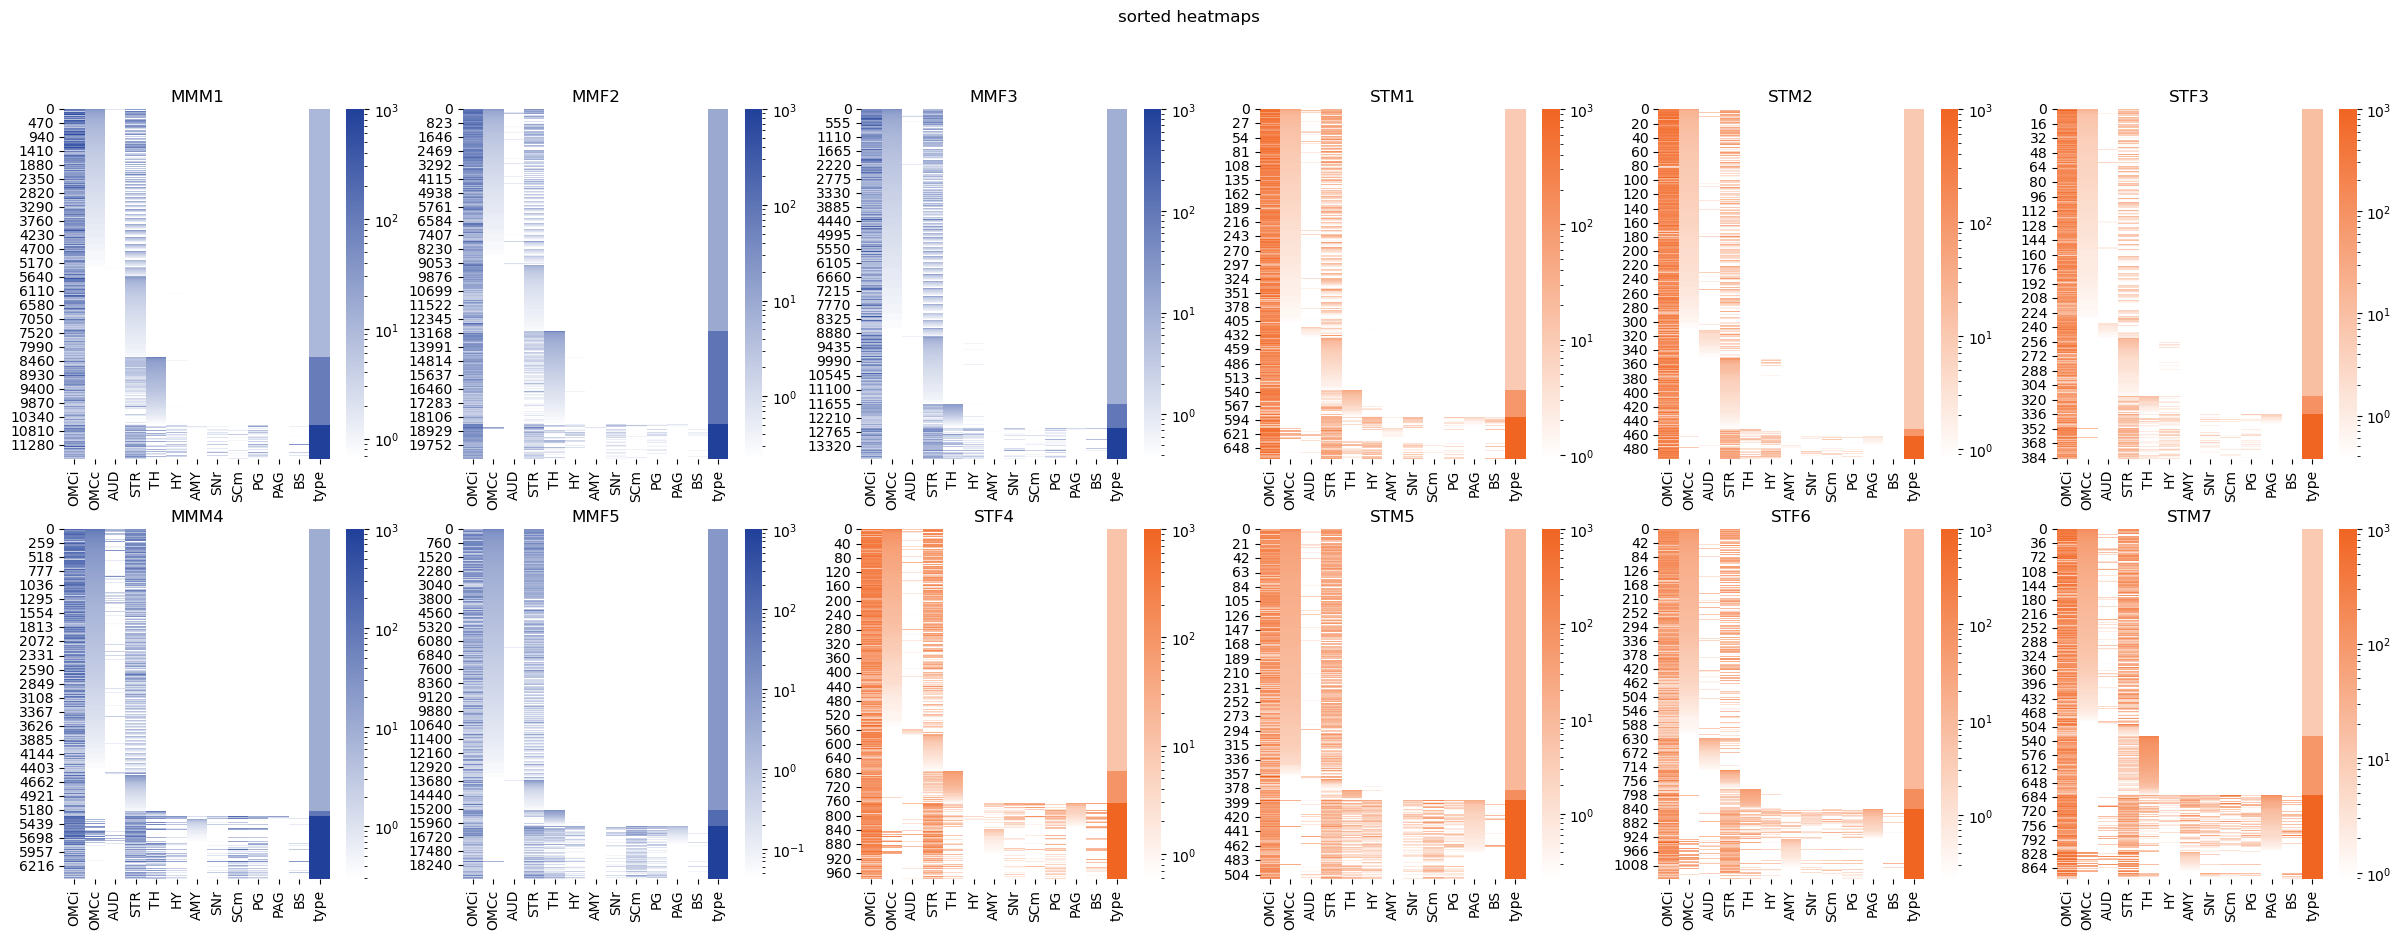

In [13]:
# sort cells?
fig, axs = plt.subplots(2, 6, figsize=(30,10))
i=0
for ax in axs.flat:
    sort_df = sort_by_celltype(omc_scaled[i], pt_areas=["AMY","SNr","SCm","PG","PAG","BS"])
    if species[i]=="MMus":
        sns.heatmap(sort_df, cmap=blue_cmp, norm=LogNorm(), ax=ax)
    else:
        sns.heatmap(sort_df, cmap=orange_cmp, norm=LogNorm(), ax=ax)
    ax.set_title(mice[i])
    
    i+=1
plt.suptitle("sorted heatmaps")
plt.show()

# covariance

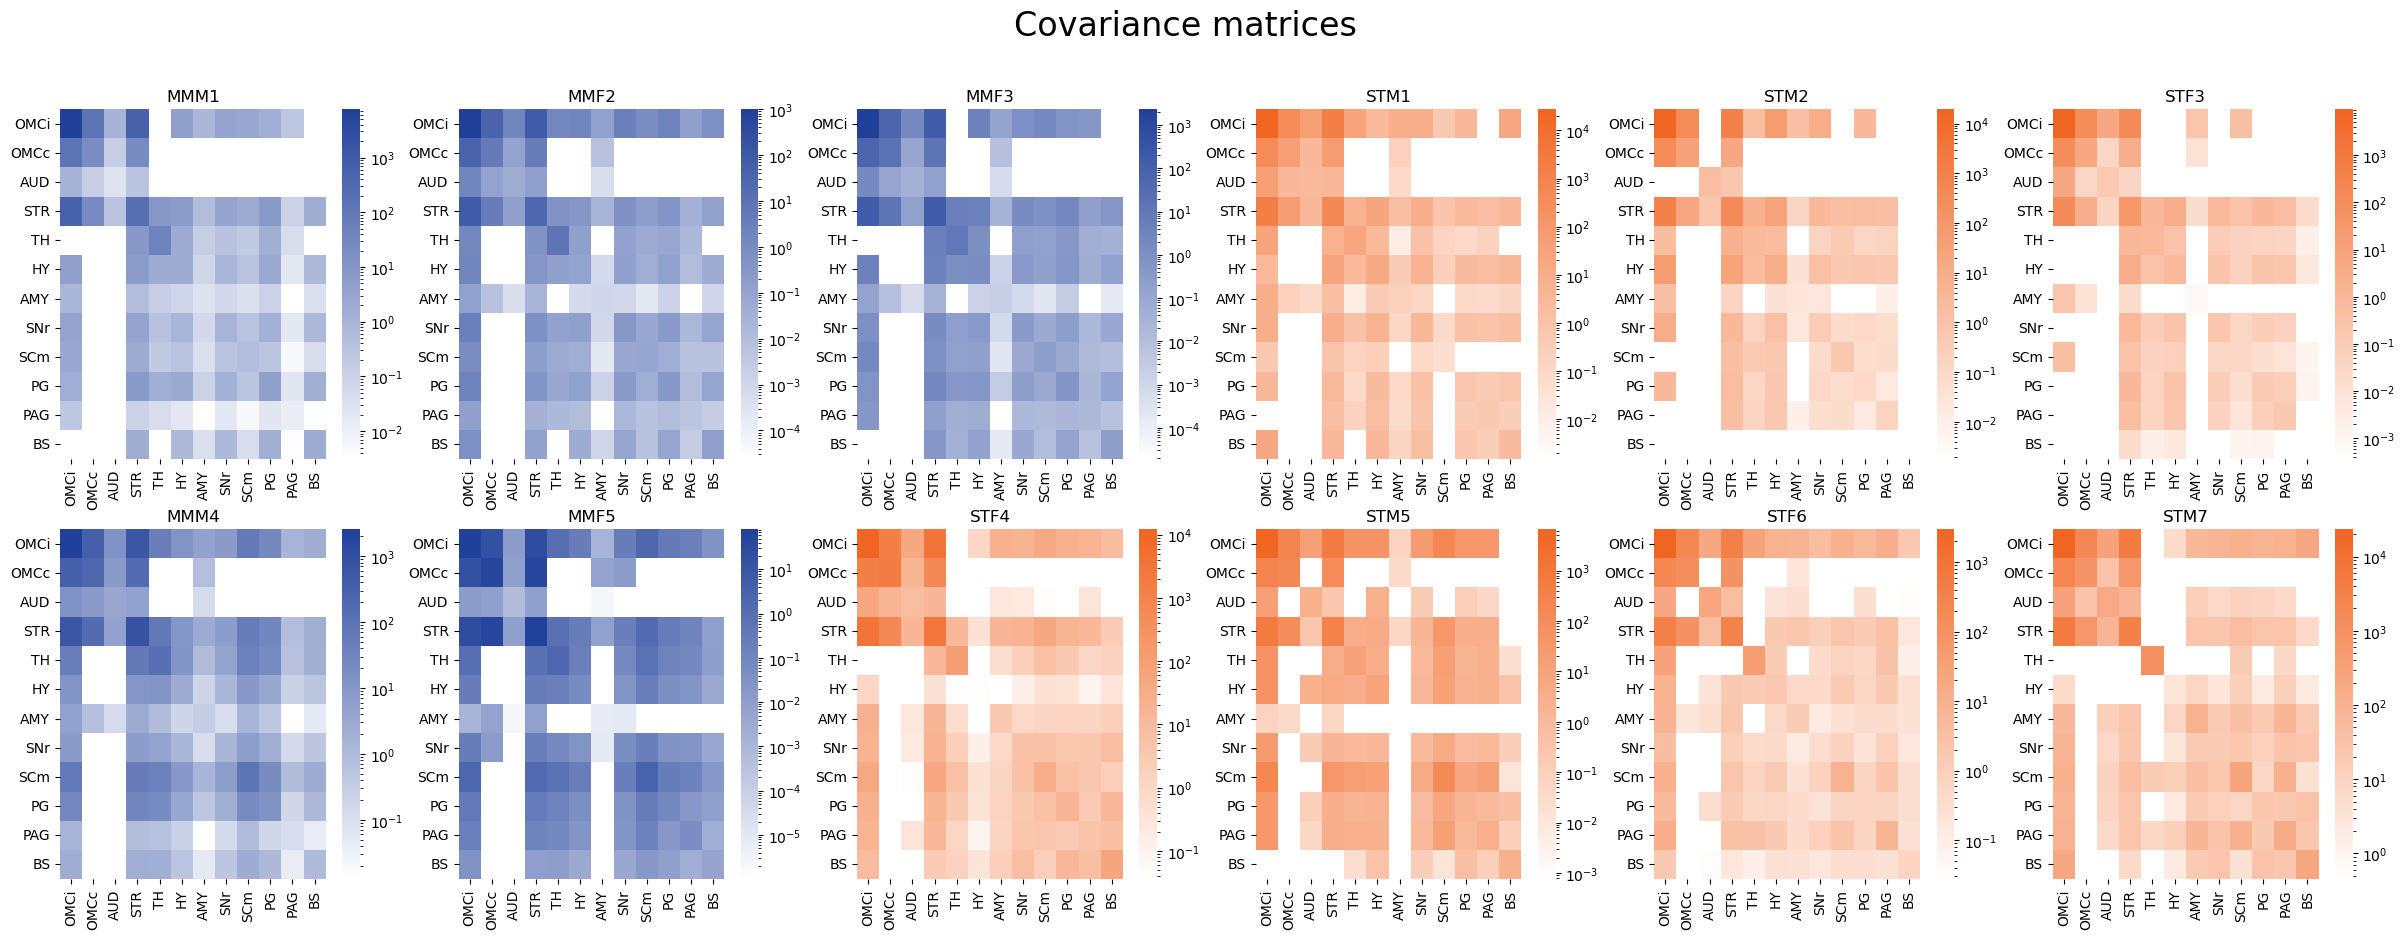

In [14]:


fig, axs = plt.subplots(2, 6, figsize=(30,10))
i=0
for ax in axs.flat:
    df = omc_scaled[i]
    if species[i]=="MMus":
        sns.heatmap(df.cov(), cmap=blue_cmp, norm=LogNorm(), ax=ax)
    else:
        sns.heatmap(df.cov(), cmap=orange_cmp, norm=LogNorm(), ax=ax)
    ax.set_title(mice[i])
    
    i+=1
plt.suptitle("Covariance matrices",size=24)
plt.show()

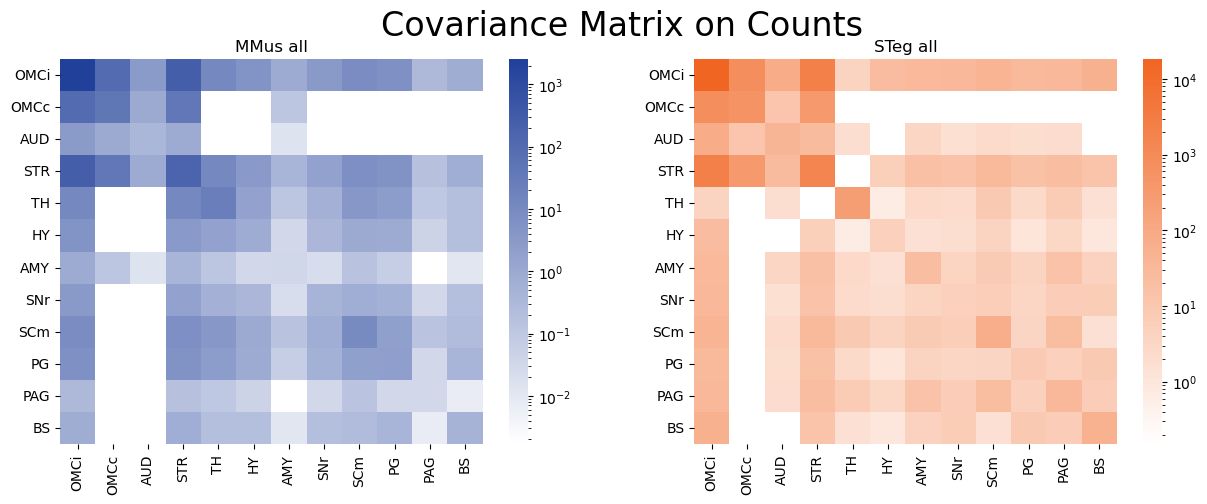

In [15]:
# aggregated covariance plots
fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.heatmap(omc_mm_all.cov(), cmap=blue_cmp, norm=LogNorm(), ax=axs[0])
axs[0].set_title("MMus all")

sns.heatmap(omc_st_all.cov(), cmap=orange_cmp, norm=LogNorm(), ax=axs[1])
axs[1].set_title("STeg all")

plt.suptitle("Covariance Matrix on Counts",size=24)
plt.show()


# PCA

In [16]:
print(omc_mm_sort.shape)
print(omc_mm_all.shape)

(73281, 13)
(71594, 12)


In [24]:
omc_st_all

,OMCi,OMCc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS
0,44.891927,0.000000,0.000000,9.052282,4.064290,4.249030,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,150.563458,6.096435,0.000000,7.574358,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,674.302605,0.000000,0.000000,65.028635,0.000000,5.726954,0.000000,2.586366,0.000000,0.0,0.000000,0.0
4,62.811749,3.140587,2.401626,84.241640,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
5,580.823942,25.309440,0.000000,31.775356,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2355,62.853107,0.000000,0.000000,16.242938,1.588983,0.000000,1.235876,2.118644,1.765537,0.0,128.354520,0.0
2358,239.759887,0.000000,0.000000,2.648305,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2359,79.096045,0.000000,0.000000,83.686441,12.005650,0.000000,1.412429,7.062147,10.240113,0.0,21.009887,0.0
2361,274.187853,61.087571,29.131356,2.118644,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [46]:
def sort_by_celltype(proj, it_areas=["OMCc", "AUD", "STR"], ct_areas=["TH"], pt_areas=["AMY","SNr","SCm","PG","PAG","RN"]):
    """
    Function takes in projection matrix and outputs matrix sorted by the 3 major celltypes:
    - IT = intratelencephalic (projects to cortical and/or Striatum), type = 10
    - CT = corticalthalamic (projects to thalamus w/o projection to brainstem), type = 100
    - PT = pyramidal tract (projects to brainstem += other areas), type = 1000
    Returns single dataframe with cells sorted and labelled by 3 cell types (IT/CT/PT)
    
    default areas:
    - it_areas=["OMCc", "AUD", "STR"]
    - ct_areas=["TH"]
    - pt_areas=["AMY","SNr","SCm","PG","PAG","RN"]
    """
    # areas = proj.columns
    # if "OMCi" in areas:
    #     ds = proj.drop("OMCi", axis=1)
    # else:
    #     ds = proj

    ds=proj
 
    

    # 1. isolate PT cells
    pt_counts = ds[pt_areas].sum(axis=1)
    pt_idx = ds[pt_counts>0].index
    ds_pt = ds.loc[pt_idx,:]
    ds_pt = ds_pt.sort_values(['PAG','AMY'], ascending=False)
    ds_pt['type'] = 1000

    # Isolate remaining non-PT cells
    ds_npt = ds.drop(pt_idx)

    # Identify CT cells by thalamus projection
    th_idx = ds_npt['TH'] > 0
    ds_th = ds_npt[th_idx]
    ds_th = ds_th.sort_values('TH', ascending=False)
    ds_th['type'] = 100

    # Identify IT cells by the remaining cells (non-PT, non-CT)
    ds_nth = ds_npt[~th_idx]
    ds_nth = ds_nth.sort_values(['OMCc','AUD','STR'],ascending=False)
    ds_nth['type'] = 10

    # combine IT and CT cells
    ds_npt = pd.concat([ds_nth, ds_th])

    # combine IT/CT and PT cells
    sorted = pd.concat([ds_npt,ds_pt],ignore_index=True)

    sorted=sorted.reset_index(drop=True)

    # add back omci if there???
    
    return sorted

In [47]:
omc_st_sort = sort_by_celltype(omc_st_all, pt_areas=["AMY", "SNr", "SCm", "PG", "PAG", "BS"])
omc_st_sort

,OMCi,OMCc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS,type
0,113.620325,1000.000000,0.000000,15.172900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,509.533898,190.854520,0.000000,175.494350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,504.116678,190.308163,0.000000,226.770172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,320.865679,183.839097,0.000000,19.289579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4,15.055281,175.135262,0.000000,309.927076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,13.876807,11.060022,0.248540,28.250694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000
5269,4.278441,0.256706,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000
5270,2.994909,8.514097,0.000000,47.447910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000
5271,53.157144,4.129439,0.000000,0.525565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000


In [50]:
sorted_mm = []
sorted_st = []
for i in range(num_samples):
    # print(omc_scaled[i].shape)
    int_sort = sort_by_celltype(omc_scaled[i], pt_areas=["AMY", "SNr", "SCm", "PG", "PAG", "BS"])
    # print(int_sort.shape)
    if species[i]=="MMus":
        sorted_mm.append(int_sort)
    else:
        sorted_st.append(int_sort)

sorted_mm_all = pd.concat(sorted_mm)
sorted_st_all = pd.concat(sorted_st)
print(sorted_mm_all.shape)
print(sorted_st_all.shape)

(71594, 13)
(4979, 13)


In [62]:
names = []
for i in range(12):
    names.append('C'+str(i))
names

['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11']

In [65]:
from sklearn.decomposition import PCA
pca = PCA()
mm_type = sorted_mm_all['type']
mm_plot = sorted_mm_all.drop("type", axis=1)
components = pca.fit_transform(mm_plot)
print(mm_plot.shape)
print(components.shape)
components[:,0].shape
plot = pd.DataFrame(components, columns = names)
# plot['type'] = mm_type
plot
# sns.scatterplot(plot, x="C0", y="C1", hue="type")

(71594, 12)
(71594, 12)


,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,70.732434,49.412457,52.496925,23.034426,1.870678,1.249431,0.208229,-0.242208,-1.585398,-0.007436,-0.129626,-0.024988
1,114.316149,83.469892,39.295317,12.184186,-0.248202,-0.337161,0.077740,0.086453,-1.445780,0.033522,-0.161136,-0.027294
2,145.431284,29.381508,47.446101,21.555971,1.905435,1.288008,0.148390,-0.233847,-1.468529,-0.029010,-0.118476,-0.023578
3,654.083030,377.559490,-41.272675,-63.941156,-16.721277,-12.675796,-0.929313,2.687426,-1.236112,0.349203,-0.506063,-0.061563
4,-6.820156,98.343868,31.934990,7.521498,-0.844450,-0.792457,0.088697,0.151316,-1.188805,0.063010,-0.142747,-0.023189
...,...,...,...,...,...,...,...,...,...,...,...,...
71589,-27.234516,-1.963206,-0.201070,-0.699531,0.087430,-0.038882,-0.056702,0.001718,0.002136,-0.005716,0.004763,-0.000770
71590,-27.370299,-2.037465,-0.283404,-0.479756,0.034496,-0.087782,-0.034402,0.008496,0.002222,-0.003877,0.005206,-0.001970
71591,-27.102072,-1.918139,-0.121855,-0.904889,0.220336,-0.013504,-0.011346,-0.041973,0.002671,-0.048661,0.004852,-0.005996
71592,26.873358,71.766038,-17.429746,-15.161738,-1.582187,0.299826,-1.183753,-0.276418,0.039215,-0.514820,-0.130451,-0.035038


# clustering?
